# Predicting Heart disease using Machine learning

We are going to take the following approach:
1. Proble definition
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation

## Problem Definition

In the given statement,
> Given clinical parameter about a patient,can we predict whether or not they have heart disease?

## Data 

The original data came from the Cleavland data from UCI machine Learning repository.

There is also a version of it available on Kaggle.https://www.kaggle.com/ronitf/heart-disease-uci/data


## Evaluation

> If reach 95% accuracy in predicting whether the patient is having heart-disease or not during the concept of proof,we'll pusrsue the project.

## Features

This is where you will get all the features or information about the data.

**Create Data Dictionary**

* age age in years

* sex (1 = male; 0 = female)

* cp chest pain type

* trestbps resting blood pressure (in mm Hg on admission to the hospital)

* chol serum cholestoral in mg/dl

* fbs (fasting blood sugar &gt; 120 mg/dl) (1 = true; 0 = false)

* restecg resting electrocardiographic results

* thalach maximum heart rate achieved

* exang exercise induced angina (1 = yes; 0 = no)

* oldpeak ST depression induced by exercise relative to rest

## Preparing the tools 

We gonaa use pandas,matplotlib and numpy for data manipulation and data analysis.

In [1]:
# Import all the tools we need

# Regular EDA (exploratory data analysis) and plotting libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# we want our plots to appear inside the notebook
%matplotlib inline 

# Models from sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score,f1_score,recall_score
from sklearn.metrics import plot_roc_curve

# Load Data

In [3]:
df = pd.read_csv("heart-disease .csv")

df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [4]:
df.shape #(rows and columns)

(303, 14)

In [7]:
# Data exploration(EDA)

In [5]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [7]:
# How many of each class there are 

df["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

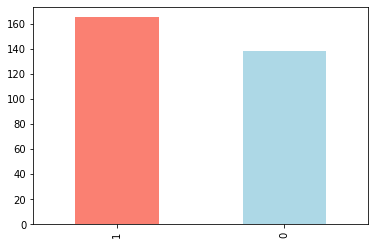

In [8]:
df["target"].value_counts().plot(kind="bar",color=["salmon","lightblue"])

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [10]:
# Are there any missing values

df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [11]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Heart disease frequency according to sex


In [12]:
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [13]:
# Compare target column with sex column 
pd.crosstab(df.target,df.sex)

sex,0,1
target,,
0,24,114
1,72,93


(array([0, 1]), <a list of 2 Text major ticklabel objects>)

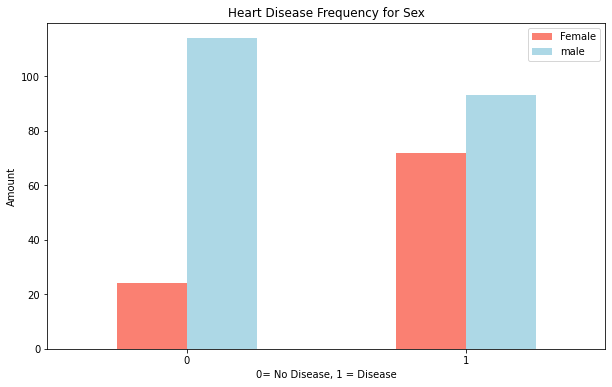

In [14]:
# Create a plot of crosstab

pd.crosstab(df.target,df.sex).plot(kind="bar",
                                  figsize=(10,6),
                                  color=["salmon","lightblue"])

plt.title("Heart Disease Frequency for Sex")
plt.xlabel("0= No Disease, 1 = Disease")
plt.ylabel("Amount")
plt.legend(["Female","male"]);
plt.xticks(rotation=0)

## Age vs maximum heart rate for heart disease


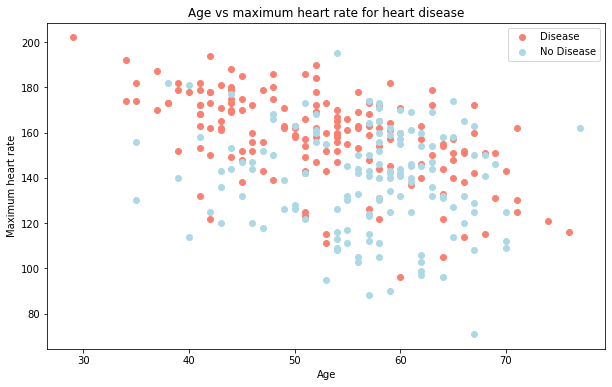

In [15]:
# Create another figure

plt.figure(figsize=(10,6))

# Scatter with positive examples
plt.scatter(df.age[df.target==1],
           df.thalach[df.target==1],
           c="salmon")

# Scatter with negetive examples
plt.scatter(df.age[df.target==0],
           df.thalach[df.target==0],
           c="lightblue")

# Add some useful info

plt.title("Age vs maximum heart rate for heart disease")
plt.xlabel("Age")
plt.ylabel("Maximum heart rate")
plt.legend(["Disease","No Disease"])



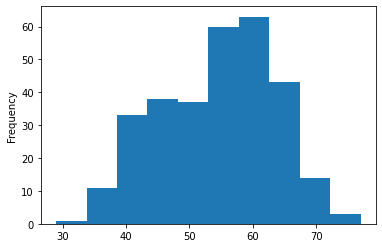

In [16]:
# Check the distribution of the age with histogram

df.age.plot.hist()

### Heart Disease frequency per chest pain type

In [17]:
pd.crosstab(df.cp,df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


In [18]:
# Make a correlation matrix
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


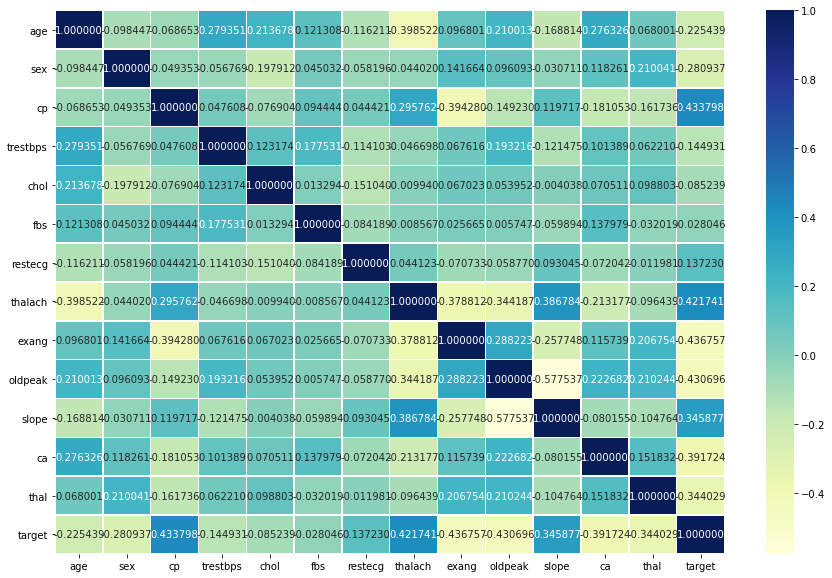

In [19]:
# Lets make our correlation matrix prettier

corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr_matrix,
                annot=True,
                linewidth = 0.5,
                fmt="2f",
                cmap="YlGnBu")

## Modeling

In [20]:
# Split data into X and y

X = df.drop("target",axis = 1)
y = df["target"]

np.random.seed(42)

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

We are going to try 3 different machine leanring models 

1. Logistic Regression
2. KNeighbor
3. Random Forest Classifier

In [21]:
# Put models in a dictionary
models={"Logistic Regression": LogisticRegression(),
       "KNN":KNeighborsClassifier(),
       "Random Forest":RandomForestClassifier()}

# Create a fucntion to fit and score models

def fit_and_score(models,X_train,X_test,y_train,y_test):
    """
    Fits and evaluate different machine learning models
    """
    
    np.random.seed(42)
    # Make a dictionary to keep model scores
    
    model_scores={}
    
    # Loop through models
    
    for name,model in models.items():
        # Fit the model to the data
        
        model.fit(X_train,y_train)
        
        # Evaluate the model and append it to the model_score
        
        model_scores[name]= model.score(X_test,y_test)
        
    return model_scores

In [22]:
model_scores = fit_and_score(models= models,
                             X_train=X_train,
                             X_test=X_test,
                             y_train=y_train,
                            y_test=y_test)

model_scores

C:\Users\Vikas Konaparthi\Desktop\mlcourse\heart-disease-project\env\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

## Model Comparision

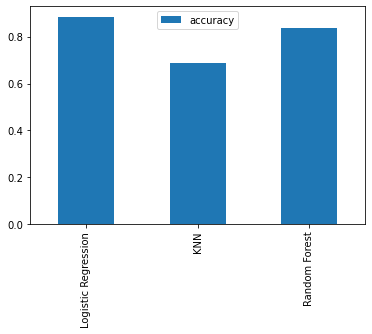

In [23]:
model_compare = pd.DataFrame(model_scores,index=["accuracy"])

model_compare.T.plot.bar()

Lets look at the following 

1. Hyperparameter tuning
2. Feature impoeratance 
3. Confusion matrix 
4. CrossValidation
5. Precision
6. Reacall
7. F1 score
8. Classification Report
9. Roc curve
10. Area under the curve


# Hyperparameter Tuning


In [24]:
# Ltes turn KNN
train_scores=[]
test_scores=[]

# Create a list of differnet values for n_neighbors

neighbors = range(1,21)

# Setup KNN instance

knn = KNeighborsClassifier()

for i in neighbors:
    knn.set_params(n_neighbors=i)
    
    #Fit the algoritm 
    
    knn.fit(X_train,y_train)
    
    # update the scoring list
    
    train_scores.append(knn.score(X_train,y_train))
    
    # Update the test list
    
    test_scores.append(knn.score(X_test,y_test))

In [25]:
train_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [26]:
test_scores

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

maximum KNN score on the test data: 75.41%


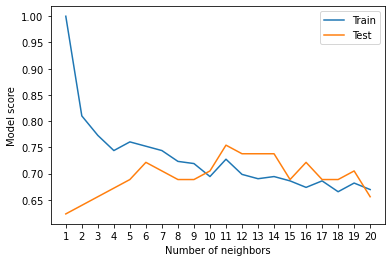

In [27]:
plt.plot(neighbors,train_scores,label="Train")
plt.plot(neighbors,test_scores,label="Test")
plt.xticks(np.arange(1,21,1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()

print(f"maximum KNN score on the test data: {max(test_scores) * 100:.2f}%")

## HyperParameter tuning with RandomizedSearchCV

We are going to use 

    * Logistic Regression
    * RandomForestClassifier

In [39]:
# Create a hyperparameter grid for LogisticRegression

log_reg_grid = {"C":np.logspace(-4,4,20),
               "solver": ["liblinear"]}

# Create a hyperparameter grid for RandomForestClassifier

rf_grid = {"n_estimators": np.arange(10,1000,50),
          "max_depth":[None,3,5,10],
          "min_samples_split":np.arange(2,20,2),
          "min_samples_leaf":np.arange(1,20,2)}

### Randomized Search CV

In [40]:
# Tune Logistic Regression 

np.random.seed(42)


rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                               param_distributions=log_reg_grid,
                               cv=5,
                               n_iter=20,
                               verbose=True)

#Fit Random hyperparameter for Logistic Regression

rs_log_reg.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.5s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=LogisticRegression(C=1.0, class_weight=None,
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=100,
                                                multi_class='auto', n_jobs=None,
                                                penalty='l2', random_state=None,
                                                solver='lbfgs', tol=0.0001,
                                                verbose=0, warm_start=False),
                   iid='deprecated', n_iter=20, n_jobs=None,
                   param_distributions={'C':...
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+0

In [32]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [33]:
rs_log_reg.score(X_test,y_test)

0.8852459016393442

In [41]:
# Now with RandomForestClassifier 

np.random.seed(42)

rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                          param_distributions=rf_grid,
                          cv=5,
                          n_iter =20,
                          verbose =True)


In [42]:
rs_rf.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  2.0min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [43]:
rs_rf.best_params_

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [44]:
rs_rf.score(X_test,y_test)

0.8688524590163934

In [45]:
model_scores

{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

# HyperParameter tuning using GridSearchCV


In [53]:
log_reg_grid = {"C":np.logspace(-4,4,30),
               "solver": ["liblinear"]}

gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid=log_reg_grid,
                          cv=5,
                          verbose=True)


In [54]:
gs_log_reg.fit(X_train,y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.8s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': array([1.00000000e-04, 1.8...
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5

In [55]:
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [56]:
gs_log_reg.score(X_test,y_test)

0.8852459016393442

## Evaluating our tuned machine learning classifier beyond accuracy
* Roc curve and Auc score
* Confusion matrix
* Classification report
* Precision
* Recall
* F1-Score

... and it would be great if cross-validation was used where possible.

To make comparision and evaluate a trained model, first we need to make predictions.

In [57]:
y_preds = gs_log_reg.predict(X_test)

y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

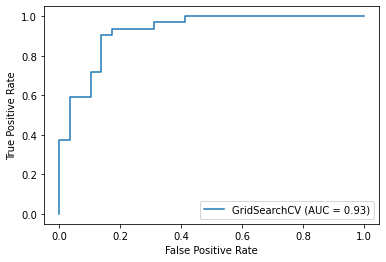

In [58]:
# Plot the ROC curve and calculate the AUC metrics

plot_roc_curve(gs_log_reg,X_test,y_test)

In [59]:
# Consusion matrix

print(confusion_matrix(y_test,y_preds))

[[25  4]
 [ 3 29]]


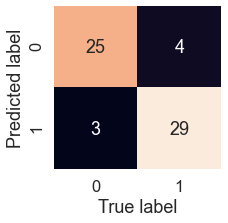

In [63]:
sns.set(font_scale=1.5)

def plot_conf_mat(y_test,y_preds):
    fig, ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(confusion_matrix(y_test,y_preds),
                    annot=True,
                    cbar=False)
    
    plt.xlabel("True label")
    plt.ylabel("Predicted label")

    
plot_conf_mat(y_test,y_preds)

In [62]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



## Classifying evaluation metrics using cross-validation

We are going to calculate the precision recall f1 using cross val score

In [64]:
# Check best hyper parameters

gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [65]:
# Create new classifier wiith best params

clf = LogisticRegression(C=0.20433597178569418,solver="liblinear")

In [68]:
# CROSS validated accuracy

cv_acc = cross_val_score(clf,X,y,cv=5,scoring="accuracy")

cv_acc

array([0.81967213, 0.90163934, 0.86885246, 0.88333333, 0.75      ])

In [70]:
cv_acc =np.mean(cv_acc)
cv_acc

0.8446994535519124

In [71]:
# CROSS validated precision
cv_precision = cross_val_score(clf,X,y,cv=5,scoring="precision")

cv_precision

cv_precision=np.mean(cv_precision)

cv_precision



0.8207936507936507

In [72]:
# CROSS validated recall
cv_recall = cross_val_score(clf,X,y,cv=5,scoring="recall")

cv_recall

cv_recall=np.mean(cv_recall)

cv_recall

0.9212121212121213

In [74]:
# CROSS validated f1_score
cv_f1 = cross_val_score(clf,X,y,cv=5,scoring="f1")

cv_f1

cv_f1=np.mean(cv_f1)

cv_f1

0.8673007976269721

In [77]:
# Vizualize our cross validation metrics

cv_metrics = pd.DataFrame({
                            "Accuracy":cv_acc,
                            "Precision":cv_precision,
                            "Recall":cv_recall,
                            "f1":cv_f1,

},
index=[0])

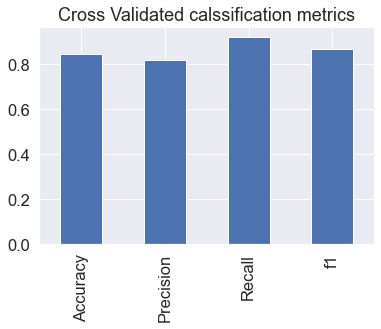

In [78]:
cv_metrics.T.plot.bar(title="Cross Validated calssification metrics",
                     legend =False)

### Feature Importance


In [82]:
# Fit an instance of Logistic Regression

clf = LogisticRegression(C=0.20433597178569418,solver="liblinear")

clf.fit(X_train,y_train)

LogisticRegression(C=0.20433597178569418, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [83]:
# Check coef
clf.coef_

array([[ 0.00316728, -0.86044651,  0.66067041, -0.01156993, -0.00166374,
         0.04386107,  0.31275847,  0.02459361, -0.6041308 , -0.56862804,
         0.45051628, -0.63609897, -0.67663373]])

In [84]:
# Match coeff of features to columns

feature_dict = dict(zip(df.columns,list(clf.coef_[0])))

feature_dict

{'age': 0.0031672801993431563,
 'sex': -0.8604465072345515,
 'cp': 0.6606704082033799,
 'trestbps': -0.01156993168080875,
 'chol': -0.001663744504776871,
 'fbs': 0.043861071652469864,
 'restecg': 0.31275846822418324,
 'thalach': 0.024593613737779126,
 'exang': -0.6041308000615746,
 'oldpeak': -0.5686280368396555,
 'slope': 0.4505162797258308,
 'ca': -0.6360989676086223,
 'thal': -0.6766337263029825}

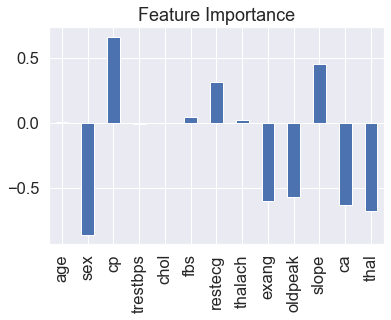

In [87]:
# Visualize feature importance
feature_df = pd.DataFrame(feature_dict,index=[0])
feature_df.T.plot.bar(title="Feature Importance",legend=False)